<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/ASSIGNMENT_NEURAL_NETWORKS_(_GAS_TURBINES_DATASET)Rev0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
df=pd.read_csv('/content/gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [7]:
print('Shape of dataset before dropping duplicates:',df.shape)

Shape of dataset before dropping duplicates: (15039, 11)


In [8]:
df.drop_duplicates(keep=False,inplace=True)

In [9]:
print('Shape of dataset after dropping duplicates:',df.shape)

Shape of dataset after dropping duplicates: (15039, 11)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [11]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [12]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [13]:
# Splitting into X and Y
X=df.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT','CDP', 'CO','NOX']]
Y=df.loc[:,['TEY']] ## Takeing Turbine energy yield as dependent variable

In [14]:
# Splitting into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)


### Using ColumnTransformer to standardize X

In [15]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

t=[('num',StandardScaler(),['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT','CDP', 'CO','NOX'])]
transformer=ColumnTransformer(transformers=t)

# fit training data
transformer.fit(X_train)

# transform training data
X_train = transformer.transform(X_train)

# transform the test data
X_test = transformer.transform(X_test)


In [16]:
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (10527, 10)
Shape of testing data (4512, 10)


## Building Neural Network base model

In [17]:
print('Input dimension:',X_test.shape[1])

Input dimension: 10


In [18]:
model = Sequential()
model.add(Dense(10, input_dim=10,kernel_initializer='uniform', activation='relu'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))



In [19]:
import pydot
import keras
from keras.utils.vis_utils import plot_model
keras.utils.vis_utils.pydot = pydot

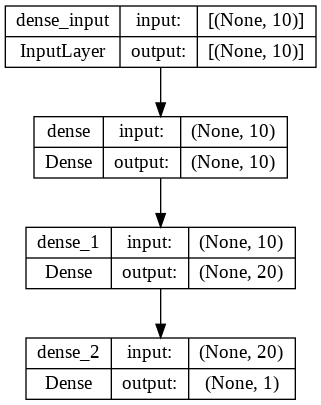

In [20]:
# Visualizing the neural network
plot_model(model,show_shapes=True, show_layer_names=True)

In [21]:
# Summary of neural network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile model

model.compile(loss='mse', optimizer='adam',metrics=['mse','mae'])

In [23]:
# Training and evaluating the model
history=model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs =50, batch_size=1000)

Epoch 1/50
11/11 [==============================] - 1s 24ms/step - loss: 18248.3418 - mse: 18248.3418 - mae: 134.1551 - val_loss: 18267.4199 - val_mse: 18267.4199 - val_mae: 134.2288
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 18242.2852 - mse: 18242.2852 - mae: 134.1327 - val_loss: 18259.8008 - val_mse: 18259.8008 - val_mae: 134.2006
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 18232.8809 - mse: 18232.8809 - mae: 134.0979 - val_loss: 18247.5449 - val_mse: 18247.5449 - val_mae: 134.1553
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 18217.6172 - mse: 18217.6172 - mae: 134.0415 - val_loss: 18227.6367 - val_mse: 18227.6367 - val_mae: 134.0818
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 18193.0859 - mse: 18193.0859 - mae: 133.9507 - val_loss: 18195.8867 - val_mse: 18195.8867 - val_mae: 133.9644
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 18154.3262 - mse:

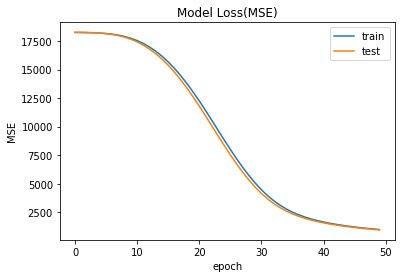

In [24]:
# plot loss during training

plt.title('Model Loss(MSE)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()

In [25]:
# evaluate the model

y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(Y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(Y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

141/141 [==============================] - 0s 1ms/step
Training set rmse: 31.012, Testing set rmse: 30.868


## Hyperparameter Tuning using RandomizedSearchCV

https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a

In [26]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [27]:
from keras.optimizers import Adam

In [28]:
from keras.wrappers.scikit_learn import KerasRegressor


In [29]:
# Building a keras regression model

def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    
    model = Sequential()
    
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
 
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))

    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = learning_rate)
    
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

In [30]:
# Wrapping the keras model in a object

keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

<ipython-input-30-fa058dad983b>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)


In [31]:
# Define the search parameters

batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


# Create a dictionary of the parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(X_train,Y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
# Summarize the results
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)


Best score: -0.5662750363349914
Best parameters: {'neuron2': 20, 'neuron1': 10, 'learning_rate': 0.01, 'init': 'normal', 'epochs': 25, 'batch_size': 1000, 'activation_function': 'linear'}


In [33]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(X_train, Y_train, validation_data=(X_test,Y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])


Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 22ms/step - loss: 18096.7734 - mse: 18096.7734 - mae: 133.6710 - val_loss: 17761.7109 - val_mse: 17761.7109 - val_mae: 132.6749
Epoch 2/25
11/11 [==============================] - 0s 5ms/step - loss: 17185.8770 - mse: 17185.8770 - mae: 130.8126 - val_loss: 16247.5820 - val_mse: 16247.5820 - val_mae: 127.3530
Epoch 3/25
11/11 [==============================] - 0s 6ms/step - loss: 15201.0020 - mse: 15201.0020 - mae: 122.7081 - val_loss: 13256.7002 - val_mse: 13256.7002 - val_mae: 114.4702
Epoch 4/25
11/11 [==============================] - 0s 5ms/step - loss: 11034.2803 - mse: 11034.2803 - mae: 104.5217 - val_loss: 7754.9976 - val_mse: 7754.9976 - val_mae: 87.7732
Epoch 5/25
11/11 [==============================] - 0s 8ms/step - loss: 4992.6709 - mse: 4992.6709 - mae: 69.2669 - val_loss: 1725.3795 - val_mse: 1725.3795 - val_mae: 41.3720
Epoch 6/25
11/11 [==============================] - 0s 7ms/step - loss: 562.6471 - mse: 562.6471 - mae: 19.30

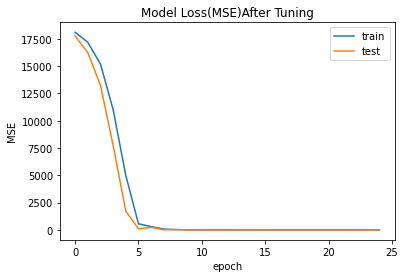

In [34]:
# PLotting Loss(MSE) After Tuning

plt.title('Model Loss(MSE)After Tuning')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()

In [35]:
# evaluate the model

y_train_pred_tuned= keras_tuned.predict(X_train)
y_test_pred_tuned= keras_tuned.predict(X_test)

from sklearn.metrics import mean_squared_error

train_rmse_tuned = mean_squared_error(Y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(Y_test, y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

141/141 [==============================] - 0s 2ms/step
Training set rmse : 0.757, Testing set rmse: 0.755


## Comparing base model and tuned model

In [36]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
result

,models,train rmse,test rmse
0,base model,31.012432,30.868443
1,tuned model,0.757195,0.754935


For both base model and tuned model, the difference between rmse for train and test set is very low indicating almost no overfitting.

For tuned model,the rmse has decreased compared to base model suggesting that hypertuning parameters has increased the efficiency of this regression model.